# Heart attack Analysys and prediction

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv('heart.csv')

In [3]:
df_heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# No empty value
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# Global information for each features
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


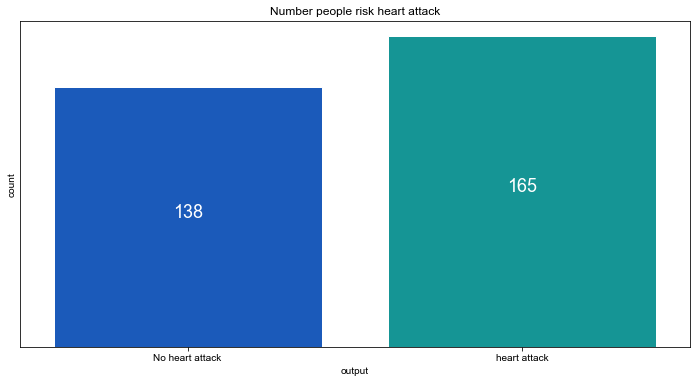

In [6]:
f, ax = plt.subplots(figsize = (12,6))
sns.set_style('dark') #set the style

count = sns.countplot(df_heart['output'], palette='winter')
ax.set_title('Number people risk heart attack')# Insert a title
ax.set_xticklabels(['No heart attack','heart attack'])#Insert a label for x ticks
ax.set_yticks([]) # Delete y ticks

#
for p in count.patches:
    count.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() / 2), ha = 'center', fontsize = 18, color = 'white')

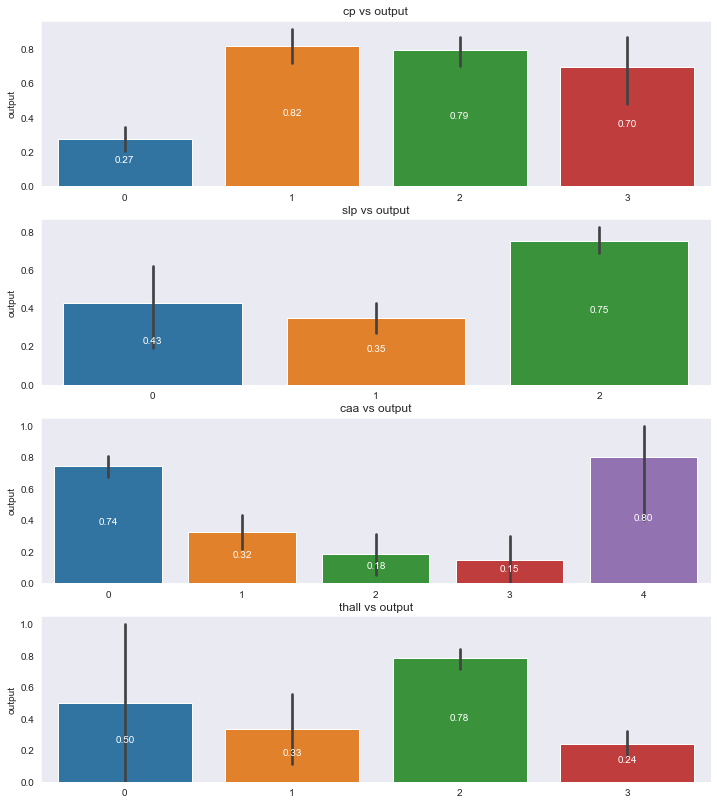

In [7]:
categories = ['cp','slp','caa','thall']


binary = ['sex','exng','fbs']

f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (12,14))

axs = [ax1,ax2,ax3,ax4]

for axe,cat in zip(axs,categories) :

 
        bar = sns.barplot(ax=axe, x= cat, y = 'output',data = df_heart)
        axe.set_xlabel('')
        axe.set_title('{} vs output'.format(cat))
        for p in bar.patches:
            bar.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() /2, p.get_height() / 2 ), ha = 'center', fontsize = 10,color = 'white' )

    

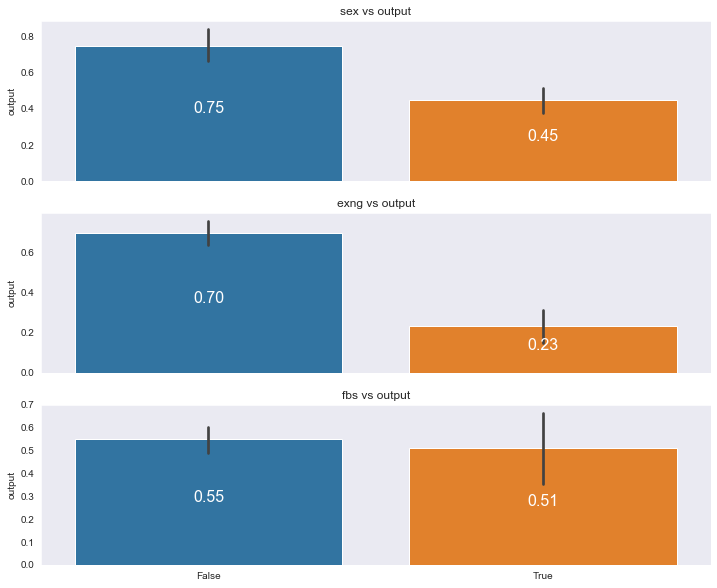

In [8]:
binary = ['sex','exng','fbs']
f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (12,10), sharex = True)

axs = [ax1,ax2,ax3]

for axe,bina in zip(axs,binary) :

 
        bar = sns.barplot(ax=axe, x= bina,y = 'output',data = df_heart)
        axe.set_xlabel('')
        axe.set_title('{} vs output'.format(bina))
        axe.set_xticklabels(['False','True'])
        for p in bar.patches:
            bar.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() /2, p.get_height() / 2 ), ha = 'center', fontsize = 16, color = 'white' )

    

In [9]:
#Strong same result for the fbs will be drop 

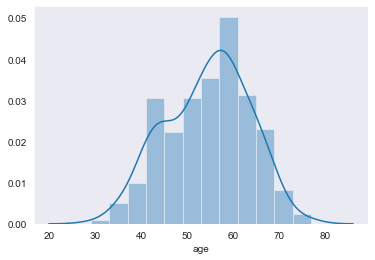

In [10]:
sns.distplot(df_heart['age'])

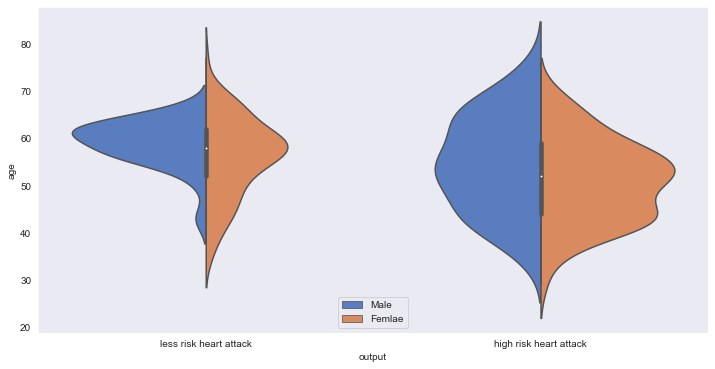

In [11]:
f, ax = plt.subplots(figsize = (12,6))
violin = sns.violinplot(x = 'output', y = 'age', data = df_heart , hue = 'sex',split = True, palette = 'muted')
ax.legend(loc = 8) # Set position center
new_labels = ['Male','Femlae'] #Legend Title
ax.set_xticklabels(['less risk heart attack','high risk heart attack'])
for text,labels in zip(violin.legend_.texts,new_labels): #Loop through all legend attribute texts
    text.set_text(labels) #Set text



In [12]:
corr = df_heart.corr()['output']

In [13]:
corr.sort_values(ascending = False) 
#Strong positive correlation with CP
#Strong negative correlation with exng/oldpeak

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

(14.0, 0.0)

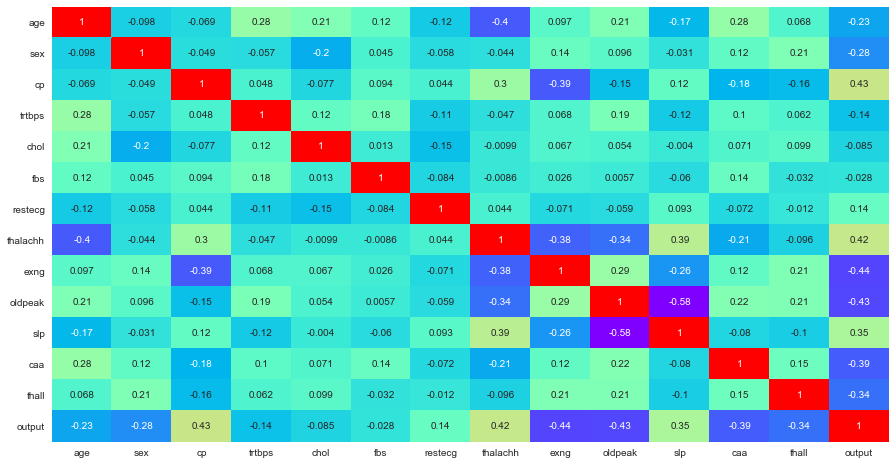

In [14]:
f, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df_heart.corr(),annot = True,cmap = 'rainbow', cbar= False)
bottom, top = ax.get_ylim() # Get correct lim
ax.set_ylim(bottom + 0.5 , top - 0.5) # Adjustment of the limit


In [15]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [16]:
#Preprocessing 

In [122]:
# No relation data use one hot encoding
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

sex_encoder = OneHotEncoder()
sex_encoded = sex_encoder.fit_transform(df_heart[['sex']])

exang_encoder = OneHotEncoder()
exang_encoded = exang_encoder.fit_transform(df_heart[['exng']])



#Cp/rest_ecg/ca are categorical value will not be transform by One Hot Encoder


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [18]:
df_sex_encoded = pd.DataFrame(data = sex_encoded.toarray(), columns = ['male','female'])
df_exng_encoded = pd.DataFrame(data = exang_encoded.toarray(), columns = ['exng_no','exng_yes'])

In [19]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df = pd.concat([df_sex_encoded,df_exng_encoded,df_heart.drop(labels = ['sex','exng','fbs'], axis = 1)], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,GridSearchCV
from sklearn.metrics import classification_report,SCORERS,confusion_matrix,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier


In [52]:
#Features
X = df.iloc[:,:-1]
#Target
y = df[['output']]


In [139]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.33, random_state=42)

In [141]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
grad = GradientBoostingClassifier()
forest = RandomForestClassifier()

In [142]:
models = {
        'lr':{'model':lr,'parameter':{'penalty':['l1','l2'], 'C':[1,2,3,5,10,20]}},
        'knn':{'model':knn,'parameter':{ 'n_neighbors': [2,5,8,10]}},
        'svc':{'model' : svc, 'parameter':{'C':[1,2,5,10,100], 'kernel':[ 'rbf', 'sigmoid'],'gamma':[0.01,0.1,0.5,1,2,5]}},
        'tree':{'model':tree,'parameter':{'max_leaf_nodes' : [3,5,10] ,'min_samples_leaf' : [1,3,5,10]}},
        'grad':{'model':grad,'parameter':{'max_leaf_nodes' : [3,5,10] ,'min_samples_leaf' : [1,3,5,10],'learning_rate':[0.1,0.5,1,10]}},
        'forest':{'model':forest,'parameter':{'max_leaf_nodes' : [3,5,10] ,'min_samples_leaf' : [1,3,5,10]}}
         }

In [143]:
dict_result = {}
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for key, model in models.items():
        grid_search = GridSearchCV(model['model'],model['parameter'], scoring = 'f1').fit(X_train,y_train)
        dict_result[key] = {'best_estimator':grid_search.best_estimator_,'f1_score':grid_search.best_score_}


In [144]:
for key,result in dict_result.items():
    print('{} f1 score : {:.2f}'.format(key,result['f1_score']))

lr f1 score : 0.85
knn f1 score : 0.82
svc f1 score : 0.85
tree f1 score : 0.79
grad f1 score : 0.83
forest f1 score : 0.86


In [145]:
# lr and svc easy to explain than random forest with a similar score
keys = ['lr','svc','forest']

In [146]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for key_model in keys :
        accuracy = np.mean(cross_val_score(dict_result[key_model]['best_estimator'],X_train,y_train,scoring='accuracy',cv = 3)) # tp + tn / tp + fp + tn + fn
        precision = np.mean(cross_val_score(dict_result[key_model]['best_estimator'],X_train,y_train,scoring='precision',cv = 3)) # tp / tp + fp
        recall = np.mean(cross_val_score(dict_result[key_model]['best_estimator'],X_train,y_train,scoring='recall',cv = 3)) # tp / tp + fn
        f1_score = np.mean(cross_val_score(dict_result[key_model]['best_estimator'],X_train,y_train,scoring='f1',cv = 3)) # 2 . precision * recall / (precision + recall)
        roc = np.mean(cross_val_score(dict_result[key_model]['best_estimator'],X_train,y_train,scoring='roc_auc',cv = 3))
        print('\n{} evaluation'.format(key_model))
        print('{} accuracy :{:.2f}'.format(key_model,accuracy))
        print('{} precision :{:.2f}'.format(key_model,precision))
        print('{} recall :{:.2f}'.format(key_model,recall))
        print('{} f1 score :{:.2f}'.format(key_model,f1_score))
        print('{} f1 auc :{:.2f}'.format(key_model,roc))
        
        



lr evaluation
lr accuracy :0.83
lr precision :0.82
lr recall :0.89
lr f1 score :0.85
lr f1 auc :0.91

svc evaluation
svc accuracy :0.84
svc precision :0.84
svc recall :0.88
svc f1 score :0.85
svc f1 auc :0.91

forest evaluation
forest accuracy :0.76
forest precision :0.83
forest recall :0.84
forest f1 score :0.83
forest f1 auc :0.87


SVC and Logistic regression are similar we will use SVC model

In [147]:
svc_fit = dict_result['svc']['best_estimator'].fit(X_train,y_train)
y_pred = svc_fit.predict(X_test)

print('confusion : matrix :\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names = ['Not heart attack','heart attackt']))

confusion : matrix :
 [[34  8]
 [10 48]]
                  precision    recall  f1-score   support

Not heart attack       0.77      0.81      0.79        42
   heart attackt       0.86      0.83      0.84        58

        accuracy                           0.82       100
       macro avg       0.81      0.82      0.82       100
    weighted avg       0.82      0.82      0.82       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
y_score_lr = dict_result['svc']['best_estimator'].fit(X_train,y_train).decision_function(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


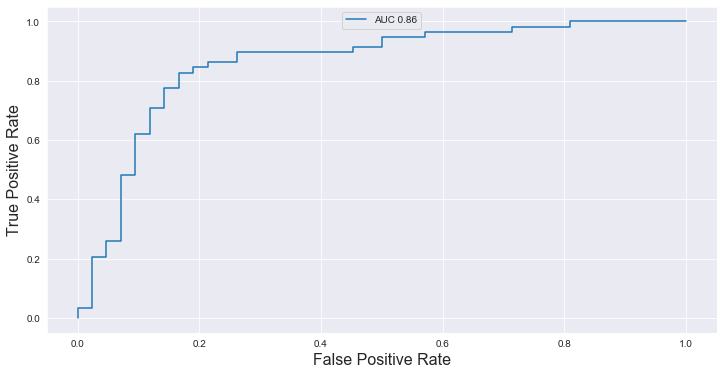

In [149]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_score_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (12,6))
plt.plot(fpr_lr,tpr_lr,label = 'AUC {:.2f}'.format(roc_auc_lr))
ax.set_ylabel('True Positive Rate',fontsize = 16)
ax.set_xlabel('False Positive Rate',fontsize = 16)
ax.legend(loc = 9)

In [150]:
#
y_score_lr = dict_result['svc']['best_estimator'].fit(X_train,y_train).decision_function(X_test)

y_score_lr_modify = np.where(y_score_lr > -2, 1 ,0)
print(confusion_matrix(y_test,y_score_lr_modify))
print(classification_report(y_test,y_score_lr_modify, target_names = ['Not heart attack','heart attackt']))

[[30 12]
 [ 6 52]]
                  precision    recall  f1-score   support

Not heart attack       0.83      0.71      0.77        42
   heart attackt       0.81      0.90      0.85        58

        accuracy                           0.82       100
       macro avg       0.82      0.81      0.81       100
    weighted avg       0.82      0.82      0.82       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Result focus on the recall to get a maximum of people getting a risk of heart attack
- Precision decreasing related to the threashold 
- F1 score 0.85 correct
- Prediction will be 81 % CORRECT
- Recall will be 90 % (find people getting high risk of heart attack)

In [151]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])